# Bitcoin Data Analysis

Dashboard
https://public.tableau.com/app/profile/rivaldo.jasper6298/viz/BTC_16668811559170/Dashboard1?publish=yes

## Description

### Objective

`Calculate the potential profit and loss of Bitcoin as short term trading instrument by historical performance from 2013 - 2021`

### Problem Statement

`1. What was the change in price of Bitcoin overtime ?`
<br>
`2. What is the optimal hold duration in Bitcoin ?`
<br>
`3. How was the day to day price trend movement ?`
<br>
`4. When is the most profitable time of trading during the period of time ?`
<br>
`5. What is the daily possible loss / profit ?`

## Working Area
### Data Loading & Cleaning

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy import stats

In [3]:
# Load the data as dataframe using Pandas
df = pd.read_csv('coin_Bitcoin.csv')

In [4]:
# Brief check of data types
df.dtypes

SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

In [5]:
# Converting the 'date' column to a datetime
df['Date'] = df['Date'].astype('datetime64[ns]')

In [6]:
# Checking null values
df.isnull().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [7]:
# Remove the duplicate rows
df.drop_duplicates()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


### Data Analysis

In [8]:
# Count Moving Average of Bitcoin
ma_day = [20, 50, 100, 200]

for ma in ma_day:
    column_name = f"MA{ma}"
    df[column_name] = df['Close'].rolling(ma).mean()

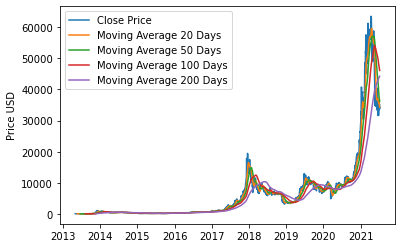

In [9]:
# Plot Bitcoin Price Overtime
x = df['Date']
plt.plot(x, df['Close'], label = 'Close Price')
plt.plot(x, df['MA20'], label = 'Moving Average 20 Days')
plt.plot(x, df['MA50'], label = 'Moving Average 50 Days')
plt.plot(x, df['MA100'], label = 'Moving Average 100 Days')
plt.plot(x, df['MA200'], label = 'Moving Average 200 Days')
plt.ylabel('Date')
plt.ylabel('Price USD')
plt.legend()
plt.rcParams['figure.figsize'] = [30, 10]
plt.show()

`Using Moving Average, we can see a significant difference of pattern between Moving Average 20 and Moving Average 50, which indicates the rally trend of bitcoin is between 20 to 50 days.`

In [10]:
# Counting the daily return and cumulative return in % of Bitcoin
df['Daily_Return'] = df['Close'].pct_change()
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod() - 1

Daily Return Skewness Value = 0.24430153346717892
Daily Return Kurtosis Value = 10.269216038101426


<AxesSubplot:>

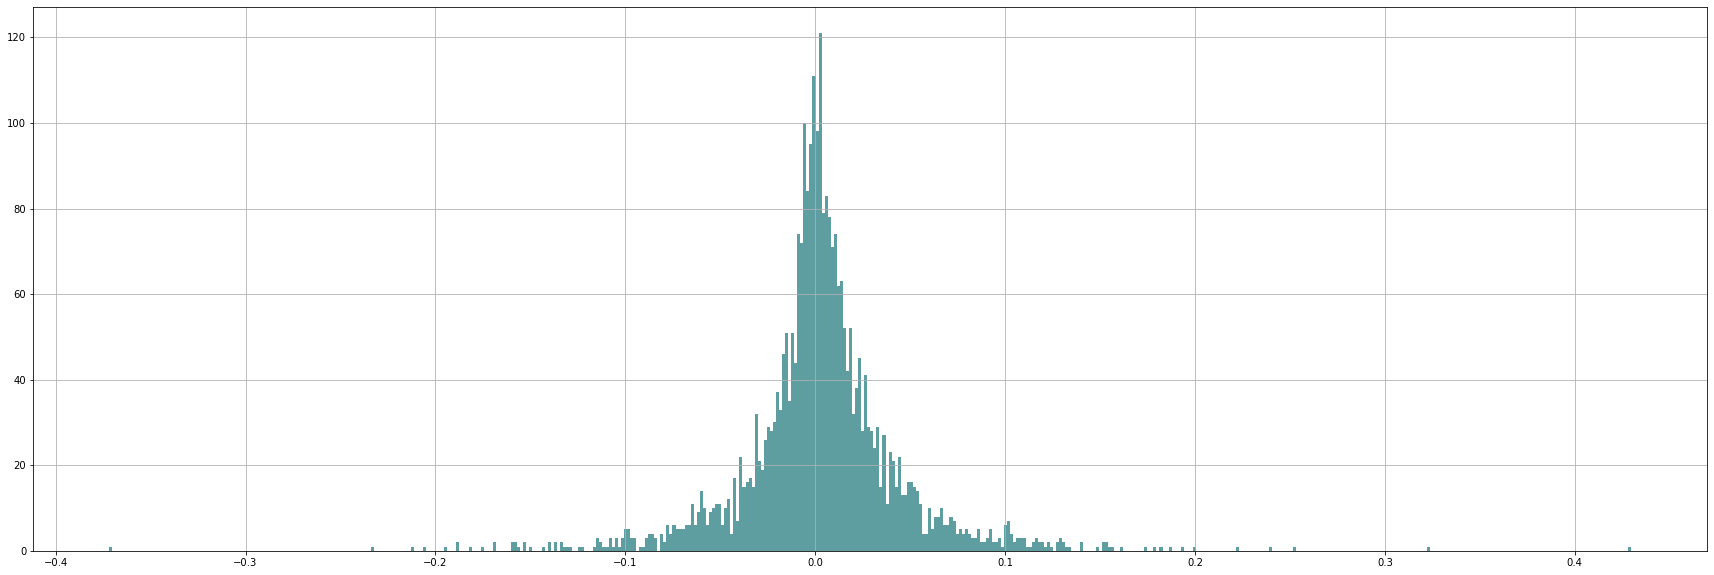

In [11]:
# Daily Return Distribution Check
print('Daily Return Skewness Value =', df['Daily_Return'].skew())
print('Daily Return Kurtosis Value =', df['Daily_Return'].kurtosis())
# Daily Return Plot
df['Daily_Return'].hist(bins = 500, color = 'cadetblue')

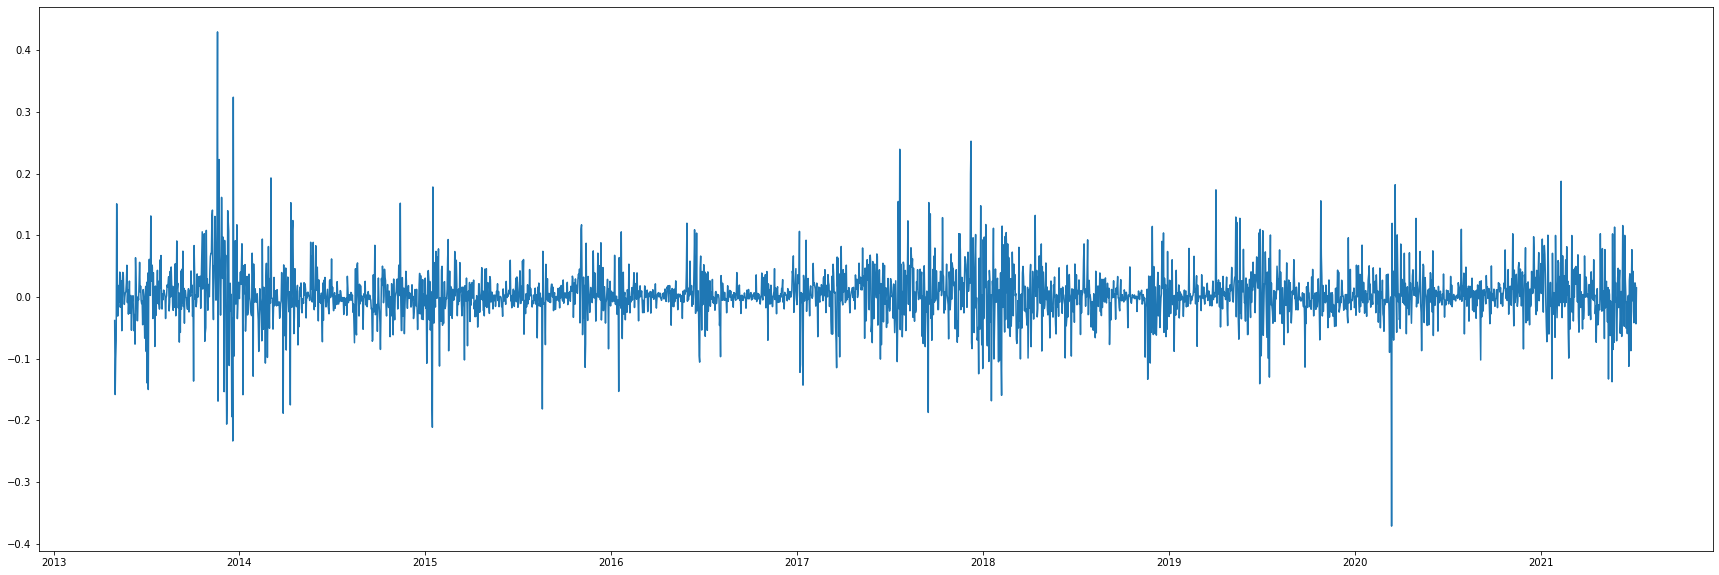

In [12]:
plt.plot(df['Date'], df['Daily_Return'])

`The daily return of bitcoin has skewness value 0.2443, which indicates the data distribution is a normal distribution.`
<br>
`While the kurtosis value shown is relatively high in positive value, which mean the trading returns may be prone to extreme values on either side or considered to be risky.`
<br>
`The daily return graph also showing alot of volatility by the sharp spike along the time period.`
<br>
`Shown in the picture, the daily return distribution has long heavy tail on both sides. Which means investors can be very profitable or loss.`

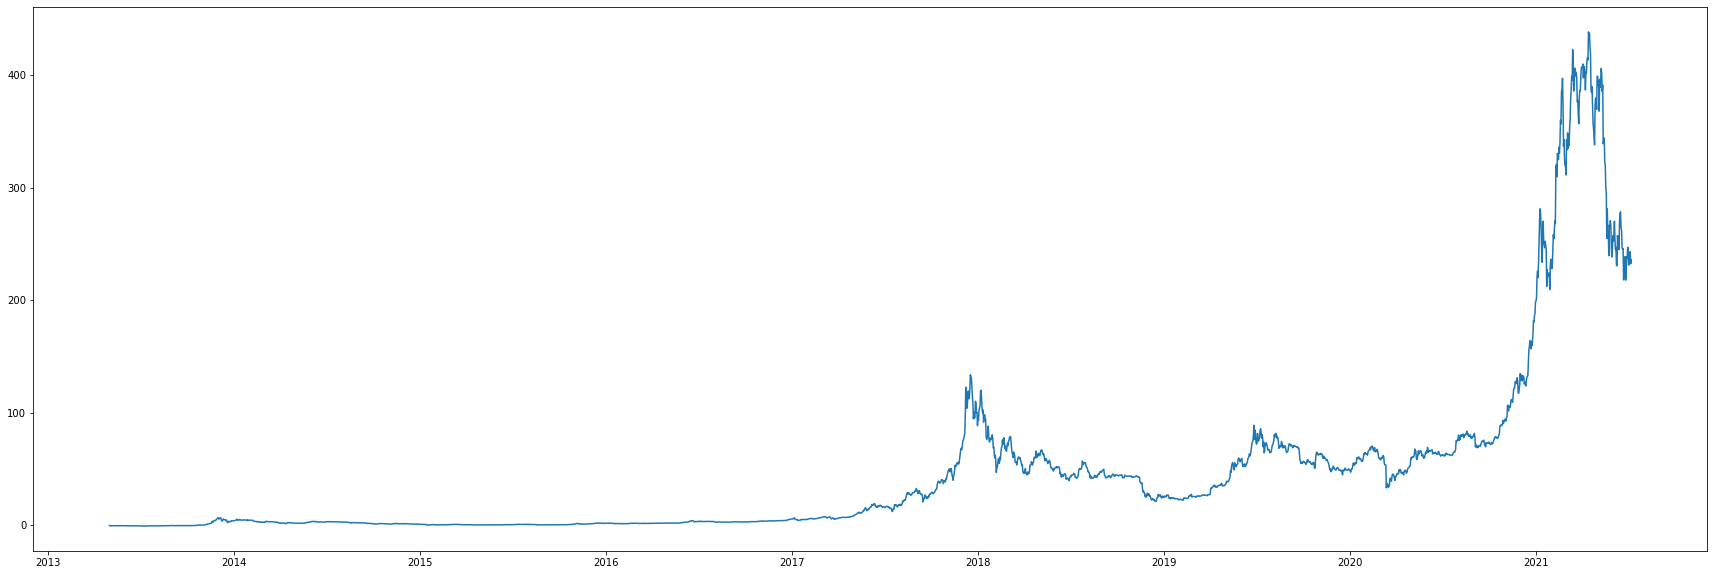

In [13]:
# Plotting cumulative returns of Bitcoin
plt.plot(df['Date'], df['Cumulative_Return'])

`The cumulative return shows aggresive spike during late 2017 to early 2018 and mid 2021. This spike indicates the best period of time to obtain the maximum value of capital gain from Bitcoin.`

In [14]:
# Creating new dataframe for loss analysis
df_neg = df[df['Daily_Return'] < 0]
df_pos = df[df['Daily_Return'] > 0]

In [15]:
# Making function for confidence interval calculation with alpha = 0.05
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return (m-h)*100, (m+h)*100

In [16]:
# Confidence interval with 5% error for loss
mean_confidence_interval(df_neg['Daily_Return'])

(-2.8272512127126204, -2.4808226411318133)

In [17]:
# Confidence interval with 5% error for profit
mean_confidence_interval(df_pos['Daily_Return'])

(2.59947762584913, 2.9247129705652464)

`Using the Confidence Interval, we are 95% sure that the average possible loss in a day is between 2.4808% to 2.827%. While the average possible profit in a day is between 2.599% to 2.9247%.`

## Conclusions

`The price of Bitcoin has changed in logarithmic patterns in a long term period shown in MA100 and MA200, while the short term period shows a linear fluctuate shown in MA20 and MA50 as the indicator.`
<br>
`The same indicator (MA), also shown that 20 to 50 days is the optimal hold / swing trading duration.`
<br>
`The daily return distribution shown that the day to day price trend is very volatile, and the long heavy tail on both side indicates the possibility of profit / loss in a high value.`
<br>
`Thus, we can conclude that Bitcoin is a very risky trading instrument.`
<br>
`Nevertheless, there are times when trading will be very profitable. Such as late 2017 to early 2018 and mid 2021.`
<br>
`While in the other day, investors are likely to gain 2.599% to 2.9247% either loss 2.480% to 2.827% in a day.`

In [18]:
# Extract the dataframe to excel file.
df.to_excel('coin_BTC_out.xlsx')